In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
from scipy.ndimage import zoom
%matplotlib inline

# Functions

In [2]:
def create_deck(n_cards):
    deck = np.zeros(np.sum(n_cards))
    for i in range(len(n_cards)):
        deck[np.sum(n_cards[0:i]):np.sum(n_cards[0:i+1])] = i
    np.random.shuffle(deck)
    return deck

def draw(hand, deck, n):
    hand = np.append(hand,deck[range(n)])
    deck = np.delete(deck,range(n))
    return (hand, deck)

def top_to_bottom(deck):
    temp = deck[0]
    deck[0:len(deck)-1] = deck[1:len(deck)]
    deck[-1] = temp
    return deck

def try_to_play_island(hand, nIslandsInPlay):
    ind = np.where(hand == 1)[0]
    if len(ind) > 0 :
        nIslandsInPlay += 1
        hand = np.delete(hand,ind[0])
    return (hand, nIslandsInPlay)

def try_to_use_strip_mine(opHand, nIslandsInPlay):
    ind = np.where(opHand == 1)[0]
    if len(ind) > 0 and nIslandsInPlay > 0 :
        nIslandsInPlay -= 1
        opHand = np.delete(opHand,ind[0])
    return (opHand, nIslandsInPlay)

def is_mana_screwed(my_hand, nIslandsInPlay):
    if nIslandsInPlay < 2 and len(np.where(my_hand == 2)[0]) > 0:
        return True
    else:
        return False

def play_games(n_games, max_turns, nc, ncOp, is_on_the_draw, allow_mulligan):
    p_mana_screwed_on_turn = np.zeros(max_turns)
    n_islands_after_turn = np.zeros(max_turns)
    for i in range(n_games):
        nIslandsInPlay = 0

        my_deck = create_deck(nc)
        my_hand = np.empty(0)
        op_deck = create_deck(ncOp)
        op_hand = np.empty(0)

        #starting hand
        start_hand_size = 7
        (my_hand, my_deck) = draw(my_hand,my_deck,start_hand_size)
        # mulligan logic 
        while (allow_mulligan and (len(np.where(my_hand == 1)[0]) < 1 or len(np.where(my_hand == 1)[0]) + len(np.where(my_hand == 3)[0]) < 2) and start_hand_size > 4):
            my_deck = create_deck(nc)
            my_hand = np.empty(0)
            start_hand_size -= 1
            (my_hand, my_deck) = draw(my_hand,my_deck,start_hand_size)
        if start_hand_size < 7:
            # scry 1
            if (len(np.where(my_hand == 1)[0]) + len(np.where(my_hand == 3)[0]) < 3):
                if my_deck[0] != 1 :
                    my_deck = np.roll(my_deck, -1)
            else :
                if my_deck[0] == 1 :
                    my_deck = np.roll(my_deck, -1)
        
        #let's say the opponent doesn't mulligan
        #-indifferent towards having strip mines in starting hand


        #start taking turns
        for i_turn in range(max_turns):
            
            if is_on_the_draw:
                
                if i_turn > 0:
                    (op_hand, op_deck) = draw(op_hand,op_deck,1)
                (op_hand, nIslandsInPlay) = try_to_use_strip_mine(op_hand, nIslandsInPlay)
                (my_hand, my_deck) = draw(my_hand,my_deck,1)
                (my_hand, nIslandsInPlay) = try_to_play_island(my_hand, nIslandsInPlay)
                if(is_mana_screwed(my_hand, nIslandsInPlay)):
                    p_mana_screwed_on_turn[i_turn] += 1.
                n_islands_after_turn[i_turn] += nIslandsInPlay

            else:
            
                if i_turn > 0:
                    (my_hand, my_deck) = draw(my_hand,my_deck,1)
                (my_hand, nIslandsInPlay) = try_to_play_island(my_hand, nIslandsInPlay)
                if(is_mana_screwed(my_hand, nIslandsInPlay)):
                    p_mana_screwed_on_turn[i_turn] += 1.
                (op_hand, op_deck) = draw(op_hand,op_deck,1)
                (op_hand, nIslandsInPlay) = try_to_use_strip_mine(op_hand, nIslandsInPlay)
                n_islands_after_turn[i_turn] += nIslandsInPlay
    
    p_mana_screwed_on_turn /= n_games
    n_islands_after_turn /= n_games
    return (p_mana_screwed_on_turn, n_islands_after_turn)



# EC, on the play

In [3]:
nUU = 12
nIsland = 16
nColorlessLand = 8
nOther = 60 - nUU - nIsland - nColorlessLand
nc = np.asarray([nOther, nIsland, nUU, nColorlessLand])
nOpStrip = 4
nOpOther = 60 - nOpStrip
ncOp = np.asarray([nOpOther, nOpStrip])

n_games = 100000
max_turns = 6
is_on_the_draw = False
allow_mulligan = True

(p_mana_screwed_on_turn, n_islands_after_turn) = play_games(n_games, max_turns, nc, ncOp, is_on_the_draw, allow_mulligan)

print('P_mana_screw:')
print(p_mana_screwed_on_turn)
print('N_islands')
print(n_islands_after_turn)

P_mana_screw:
[0.76828 0.21307 0.16746 0.14579 0.1278  0.11226]
N_islands
[0.92911 1.67142 2.183   2.53386 2.7943  3.0155 ]


# Swedish, on the play

In [4]:
nUU = 12
nIsland = 19
nColorlessLand = 5
nOther = 60 - nUU - nIsland - nColorlessLand
nc = np.asarray([nOther, nIsland, nUU, nColorlessLand])
nOpStrip = 1
nOpOther = 60 - nOpStrip
ncOp = np.asarray([nOpOther, nOpStrip])

n_games = 100000
max_turns = 6
is_on_the_draw = False
allow_mulligan = True

(p_mana_screwed_on_turn, n_islands_after_turn) = play_games(n_games, max_turns, nc, ncOp, is_on_the_draw, allow_mulligan)

print('P_mana_screw:')
print(p_mana_screwed_on_turn)
print('N_islands')
print(n_islands_after_turn)

P_mana_screw:
[0.77192 0.10306 0.07091 0.05221 0.03785 0.02711]
N_islands
[0.98122 1.86466 2.55892 3.08929 3.5086  3.86183]


# EC, on the draw

In [5]:
nUU = 12
nIsland = 16
nColorlessLand = 8
nOther = 60 - nUU - nIsland - nColorlessLand
nc = np.asarray([nOther, nIsland, nUU, nColorlessLand])
nOpStrip = 4
nOpOther = 60 - nOpStrip
ncOp = np.asarray([nOpOther, nOpStrip])

n_games = 100000
max_turns = 6
is_on_the_draw = True
allow_mulligan = True

(p_mana_screwed_on_turn, n_islands_after_turn) = play_games(n_games, max_turns, nc, ncOp, is_on_the_draw, allow_mulligan)

print('P_mana_screw:')
print(p_mana_screwed_on_turn)
print('N_islands')
print(n_islands_after_turn)

P_mana_screw:
[0.81975 0.17797 0.13143 0.1137  0.09975 0.0867 ]
N_islands
[0.99715 1.78919 2.37639 2.79184 3.09182 3.32849]


# Swedish, on the draw

In [6]:
nUU = 12
nIsland = 19
nColorlessLand = 5
nOther = 60 - nUU - nIsland - nColorlessLand
nc = np.asarray([nOther, nIsland, nUU, nColorlessLand])
nOpStrip = 1
nOpOther = 60 - nOpStrip
ncOp = np.asarray([nOpOther, nOpStrip])

n_games = 100000
max_turns = 6
is_on_the_draw = True
allow_mulligan = True

(p_mana_screwed_on_turn, n_islands_after_turn) = play_games(n_games, max_turns, nc, ncOp, is_on_the_draw, allow_mulligan)

print('P_mana_screw:')
print(p_mana_screwed_on_turn)
print('N_islands')
print(n_islands_after_turn)

P_mana_screw:
[0.82495 0.07704 0.04893 0.0348  0.02488 0.01785]
N_islands
[0.99897 1.91461 2.68409 3.28974 3.76754 4.15775]


# CE, on the play, no mulligan

In [7]:
nUU = 12
nIsland = 16
nColorlessLand = 8
nOther = 60 - nUU - nIsland - nColorlessLand
nc = np.asarray([nOther, nIsland, nUU, nColorlessLand])
nOpStrip = 4
nOpOther = 60 - nOpStrip
ncOp = np.asarray([nOpOther, nOpStrip])

n_games = 100000
max_turns = 6
is_on_the_draw = False
allow_mulligan = False

(p_mana_screwed_on_turn, n_islands_after_turn) = play_games(n_games, max_turns, nc, ncOp, is_on_the_draw, allow_mulligan)

print('P_mana_screw:')
print(p_mana_screwed_on_turn)
print('N_islands')
print(n_islands_after_turn)

P_mana_screw:
[0.81019 0.32208 0.26552 0.22982 0.19901 0.17278]
N_islands
[0.83868 1.496   1.971   2.31307 2.57458 2.79557]


# CE, on the play, no mulligan, analytical estimate for turn 2

In [8]:
nUU = 12
nIsland = 16
nColorlessLand = 8
nOpStrip = 4

m = 1.
for i in range(8):
    m *= (60-nOpStrip-i)/(60.-i)
Pstrip = 1. - m


m = 1.
for i in range(8):
    m *= (60-nUU-i)/(60.-i)
PUU = 1. - m

m = 1.
for i in range(7):
    m *= (60-nIsland-i)/(60.-i)
P1Island =  m * 8. * nIsland/52.

m = 1.
for i in range(6):
    m *= (60-nIsland-i)/(60.-i)
P2Islands =  m * 8 * 7. / 2. * (nIsland-1)/52. * nIsland/53.

Pscrew = PUU * (P1Island + P2Islands * Pstrip)

print('Pstrip = ' +str(Pstrip))
print('PUU = ' +str(PUU))
print('P1Island = ' +str(P1Island))
print('P2Islands = ' +str(P2Islands))
print('Pscrew = ' +str(Pscrew))


Pstrip = 0.4448204087073323
PUU = 0.8525185962049019
P1Island = 0.24424096802822692
P2Islands = 0.3438049376166948
Pscrew = 0.33859687471226796


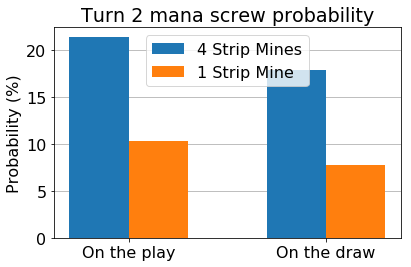

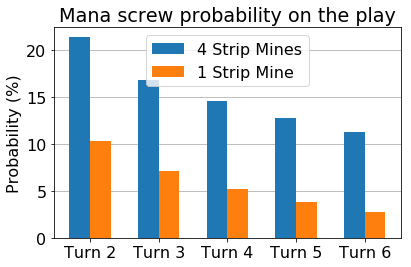

In [42]:
plt.rcParams.update({'font.size': 16})

ind=np.asarray([1,2])
EC_2=np.asarray([0.21307, 0.17797]) * 100.
SW_2=np.asarray([0.10306, 0.07704]) * 100.
EC_play = np.asarray([0.76828, 0.21307, 0.16746, 0.14579, 0.1278,  0.11226]) * 100.
SW_play = np.asarray([0.77192, 0.10306, 0.07091, 0.05221, 0.03785, 0.02711]) * 100.
width = 0.3

plt.grid(zorder = 0)
plt.gca().xaxis.grid(False)
plt.bar(ind-width/2., EC_2, width, label='4 Strip Mines', zorder=3)
plt.bar(ind+width/2., SW_2, width, label='1 Strip Mine', zorder=3)
plt.legend(loc=9)
plt.gca().set_xticks(ind)
plt.gca().set_xticklabels(['On the play', 'On the draw'])
plt.gca().set_ylabel('Probability (%)')
plt.gca().set_title('Turn 2 mana screw probability')
plt.tight_layout()
plt.savefig('EC_vs_SW_turn2.jpg', dpi=100)
plt.show()


ind=np.asarray([2,3,4,5,6])
plt.grid(zorder = 0)
plt.gca().xaxis.grid(False)
plt.bar(ind-width/2., EC_play[1:], width, label='4 Strip Mines', zorder=3)
plt.bar(ind+width/2., SW_play[1:], width, label='1 Strip Mine', zorder=3)
plt.legend(loc=9)
plt.gca().set_xticks(ind)
plt.gca().set_xticklabels(['Turn 2', 'Turn 3', 'Turn 4', 'Turn 5', 'Turn 6'])
plt.gca().set_ylabel('Probability (%)')
plt.gca().set_title('Mana screw probability on the play')
plt.tight_layout()
plt.savefig('EC_vs_SW_play.jpg', dpi=100)
plt.show()